## Импорт библиотек

In [83]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

## Чтение данных

In [51]:
netflix = pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')

netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [68]:
# функция визуализирующая распределение фильмов по столбцам, столбчатая диаграмма

def plot_bar_column(df,colname):
    
    col_dict = {}
    for i in df.index:
        column_values = df.loc[i,colname].split("/")
        for j in range(len(column_values)):
            if column_values[j] in col_dict:
                col_dict[column_values[j]] +=1
            else:
                col_dict[column_values[j]]=1
                
    col_dict = sorted(col_dict.items(),reverse=True, key=lambda x:x[1])
    sortdict = dict(col_dict)
    plt.figure(figsize=(20,8))
    sns.barplot(y=list(sortdict.values()), x=list(sortdict.keys()))
    plt.xticks(rotation=90) 

### 1. Фильмы какого жанра наиболее популярные? А какого менее?

### Гипотеза

Популярность жанра оценим, по его средней оценке, средняя оценка жанра расчитаем на основе оценок фильмов.

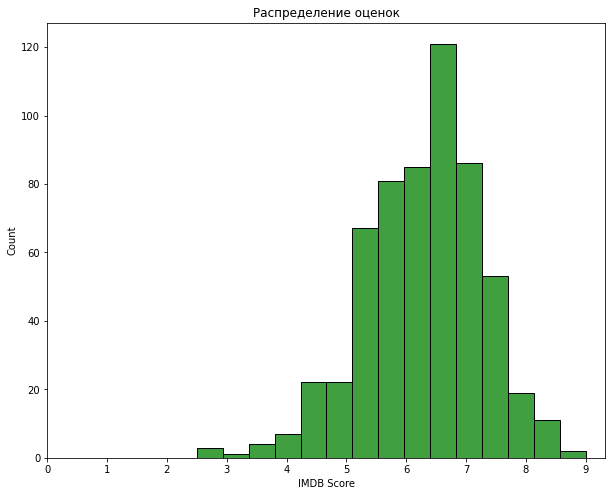

In [69]:
# распределение оценок

plt.figure(figsize=(10,8))
sns.histplot(x='IMDB Score', data=netflix, bins=15, color='green')
plt.xticks(range(0,10,1))
plt.title('Распределение оценок');

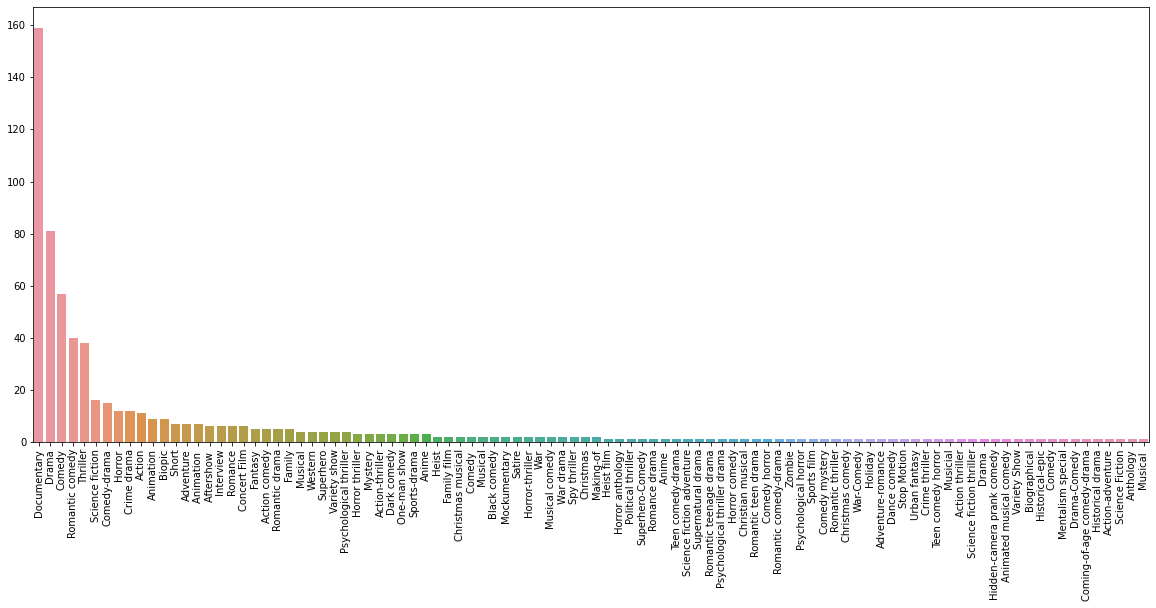

In [70]:
plot_bar_column(netflix, 'Genre')

In [73]:
# вычисляем среднюю оценку для жанров

netflix.groupby('Genre')['IMDB Score'].mean().reset_index(name='Average_rating').\
sort_values('Average_rating', ascending=False).head(5)

,Genre,Average_rating
17,Animation/Christmas/Comedy/Adventure,8.200000
70,Musical / Short,7.700000
40,Concert Film,7.633333
24,Anthology/Dark comedy,7.600000
15,Animation / Science Fiction,7.500000


In [57]:
netflix.groupby('Genre')['IMDB Score'].mean().reset_index(name='Average_rating').\
sort_values('Average_rating', ascending=True).head(5)

,Genre,Average_rating
56,Heist film/Thriller,3.7
72,Musical/Western/Fantasy,3.9
61,Horror anthology,4.3
75,Political thriller,4.3
101,Superhero-Comedy,4.4


### Результат: самые популярные жанры по среднему рейтингу IMDB

* Animation/Christmas/Comedy/Adventur
* Musical / Short
* Concert Film
* Anthology/Dark comedy
* Animation / Science Fiction

ТОП-1 - Animation/Christmas/Comedy/Adventur


### Наимение популярные жанры по среднему рейтингу IMDB

* Heist film/Thriller
* Musical/Western/Fantasy
* Horror anthology	
* Political thriller	
* Superhero-Comedy

LOSER-1 - Heist film/Thriller

### 2. На каком языке Netflix чаще всего снимает фильмы?

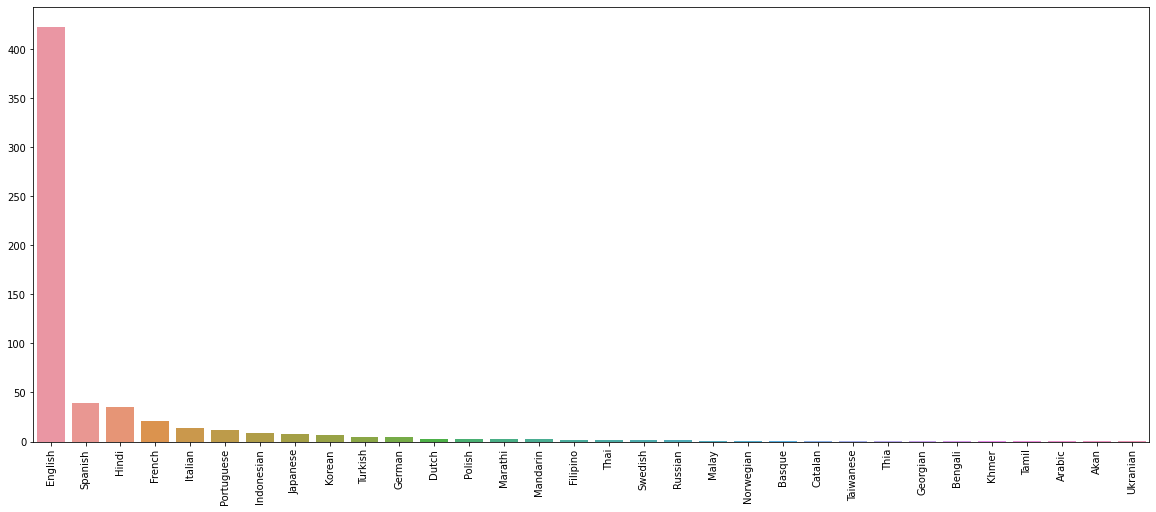

In [74]:
plot_bar_column(netflix, 'Language')

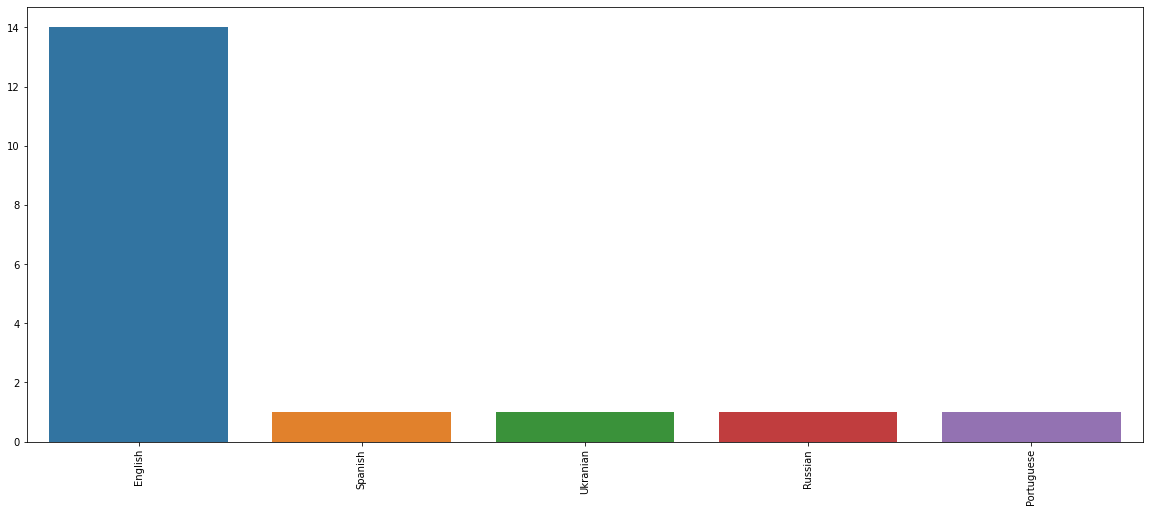

In [75]:
def highly_rated_show(df):
    df_popular = df[df['IMDB Score'] > 8]
    plot_bar_column(df_popular, 'Language')
    
highly_rated_show(netflix)

### Ответ:

Чаще всего Netflix снимает фильмы на английском языке.

### 3. Есть ли зависимость между длительностью фильма и его рейтингом?

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


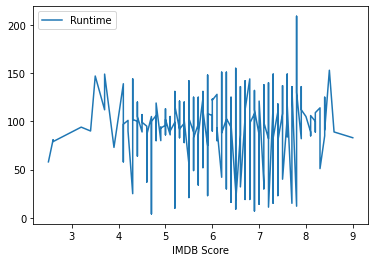

In [60]:
data = netflix[['Runtime','IMDB Score']]
data.plot('IMDB Score','Runtime')
correlation = data.corr(method='pearson')
correlation

### Ответ: корреляции между длительностью фильма и его рейтингом нет.

### 4. Порекомендуйте, на какой месяц лучше всего запланировать премьеру нового фильма. Почему? 

In [76]:
# добавим месяцы в наш датасет

netflix['Month'] = pd.to_datetime(netflix['Premiere']).dt.month_name()

In [77]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,August
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,August
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,December
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,January
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,October


In [79]:
# средние оценки месяцев

netflix.groupby('Month')['IMDB Score'].mean().reset_index(name='Average_rating').\
sort_values('Average_rating', ascending=False).head(12)

,Month,Average_rating
6,June,6.582857
10,October,6.522078
11,September,6.481132
9,November,6.398246
7,March,6.322917
2,December,6.274510
8,May,6.213208
3,February,6.117949
5,July,6.091176
0,April,6.049206


In [88]:
# количество оценок по месяцам

netflix.groupby('Month')['IMDB Score'].count().reset_index(name='Count_rating').\
sort_values('Count_rating', ascending=False).head(12)

,Month,Count_rating
10,October,77
0,April,63
9,November,57
8,May,53
11,September,53
2,December,51
7,March,48
3,February,39
1,August,37
4,January,37


In [80]:
# количество вышедших фильмов по месяцам

month = netflix.Month.value_counts(sort=False)
month

December     51
May          53
January      37
August       37
October      77
July         34
September    53
June         35
March        48
February     39
April        63
November     57
Name: Month, dtype: int64

In [81]:
month.index
month.values

array([51, 53, 37, 37, 77, 34, 53, 35, 48, 39, 63, 57], dtype=int64)

In [87]:
months = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

fig = px.bar(data_frame=netflix, x=months, y=month.values, labels={'y':'Количество фильмов за каждый месяц', 'x':'Месяц'})

fig.show()

### Выводы:
Октябрь и апрель — месяцы с наибольшим количеством выпусков фильмов. 
В летнее время выходит наименьшее количество фильмов.

В Июне, Октябре, Сентябре среднее значение оценок фильма наиболее высокие. 

В октябре, апреле, ноябре видна наибольшая активность пользователь, в эти месяцы было поставлено больше всего оценок фильмов.

### Опираясь на полученные данные, можем предложить, что октябрь может лучше всего подойти для премьеры фильма (это наша гипотеза).